In [52]:
# conda activate realtime

# import packages and data

import sys
#!pip install moscot
#import moscot
import matplotlib.pyplot as plt
# warnings
import warnings
# from matplotlib.errors import MatplotlibDeprecationWarning

# warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
# warnings.filterwarnings(
#     action="ignore", module="matplotlib", message="'matplotlib.cbook' has no attribute 'mplDeprecation'"
# )
from moscot.problems.time import TemporalProblem

import cellrank as cr
import scanpy as sc
from cellrank.kernels import RealTimeKernel

sc.settings.set_figure_params(frameon=False, dpi=100)
cr.settings.verbosity = 2

In [50]:
import os
out_dir = "/w5home/bmoore/scRNAseq/LiFangChu/fluidigm_gup_expr_results/realtime/"
os.mkdir(out_dir)

In [2]:
# get adata
adata = sc.read_h5ad("/w5home/bmoore/scRNAseq/LiFangChu/fluidigm_gup_expr_results/output_20231114_102348/clustered_seurat_obj.h5ad")
adata

AnnData object with n_obs × n_vars = 576 × 19084
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.5', 'seurat_clusters'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [3]:

adata.obs["time"] = adata.obs["orig.ident"]#.astype(float).astype("category")
print(adata.obs["time"].unique())
#categories = [1,2,3,4,5,6]
#adata.obs["time"].cat.categories = ["1","2","3","4","5","6"]
#adata.obs["time_numerical"] = adata.obs["time"].astype(float)

['ResyncTime1' 'ResyncTime2' 'ResyncTime3' 'ResyncTime4' 'ResyncTime5'
 'ResyncTime6']


In [38]:
# replacing values
adata.obs["time"].replace(['ResyncTime1', 'ResyncTime2', 'ResyncTime3', 'ResyncTime4', 'ResyncTime5',
 'ResyncTime6'],[1, 2, 3, 4, 5, 6], inplace=True)
print(adata.obs["time"].unique())

[1, 2, 3, 4, 5, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6]


In [4]:
# visualize this data using the original force-directede layout
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30, random_state=0)
sc.tl.draw_graph(adata, layout='fa')


/w5home/bmoore/miniconda3/envs/realtime/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/w5home/bmoore/miniconda3/envs/realtime/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/tmp/ipykernel_36573/3396323191.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


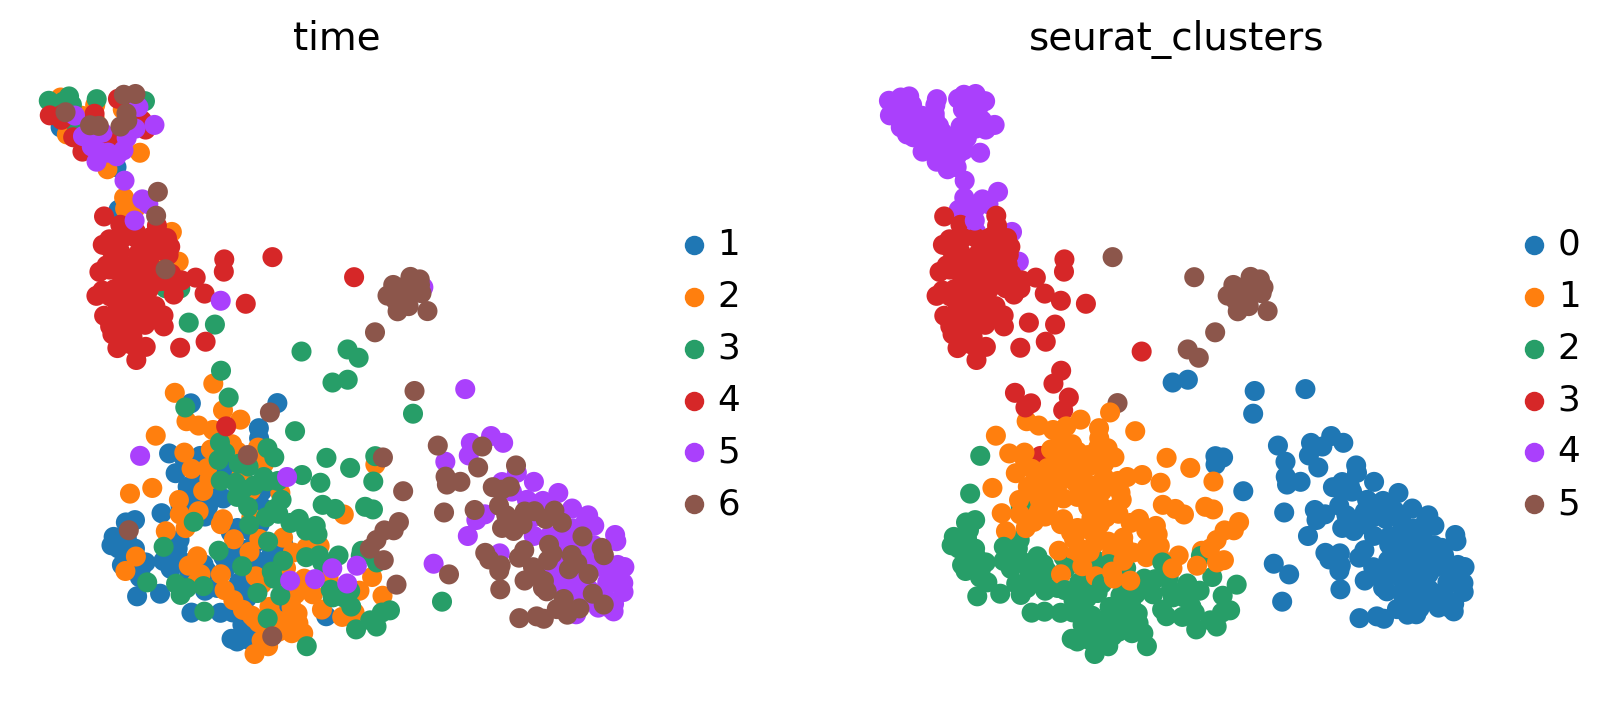

In [57]:
with plt.rc_context():
    sc.pl.embedding(
        adata,
        basis="X_draw_graph_fa",
        color=["time", "seurat_clusters"],
        color_map="gnuplot",
        show=False)
    plt.tight_layout()
    plt.savefig(out_dir + "force_directed_graph.pdf", bbox_inches='tight')

In [54]:
print(adata.obsm.keys())

KeysView(AxisArrays with keys: X_pca, X_umap, X_draw_graph_fa)


In [20]:
# get proliferation and apopstosis genes
import moscot as mt
from moscot.utils.data import proliferation_markers, apoptosis_markers
p_markers = proliferation_markers("human")
a_markers = apoptosis_markers("human")
print(p_markers,a_markers)
type(p_markers)

['ANLN', 'ANP32E', 'ATAD2', 'AURKA', 'AURKB', 'BIRC5', 'BLM', 'BRIP1', 'BUB1', 'CASP8AP2', 'CBX5', 'CCNB2', 'CCNE2', 'CDC20', 'CDC25C', 'CDC45', 'CDC6', 'CDCA2', 'CDCA3', 'CDCA7', 'CDCA8', 'CDK1', 'CENPA', 'CENPE', 'CENPF', 'CHAF1B', 'CKAP2', 'CKAP2L', 'CKAP5', 'CKS1B', 'CKS2', 'CLSPN', 'CTCF', 'DLGAP5', 'DSCC1', 'DTL', 'E2F8', 'ECT2', 'EXO1', 'FAM64A', 'FEN1', 'G2E3', 'GAS2L3', 'GINS2', 'GMNN', 'GTSE1', 'HELLS', 'HJURP', 'HMGB2', 'HMMR', 'HN1', 'KIF11', 'KIF20B', 'KIF23', 'KIF2C', 'LBR', 'MCM2', 'MCM4', 'MCM5', 'MCM6', 'MKI67', 'MLF1IP', 'MSH2', 'NASP', 'NCAPD2', 'NDC80', 'NEK2', 'NUF2', 'NUSAP1', 'PCNA', 'POLA1', 'POLD3', 'PRIM1', 'PSRC1', 'RAD51', 'RAD51AP1', 'RANGAP1', 'RFC2', 'RPA2', 'RRM1', 'RRM2', 'SLBP', 'SMC4', 'TACC3', 'TIPIN', 'TMPO', 'TOP2A', 'TPX2', 'TTK', 'TUBB4B', 'TYMS', 'UBE2C', 'UBR7', 'UHRF1', 'UNG', 'USP1', 'WDR76'] ['ADD1', 'AIFM3', 'ANKH', 'ANXA1', 'APP', 'ATF3', 'AVPR1A', 'BAX', 'BCAP31', 'BCL10', 'BCL2L1', 'BCL2L10', 'BCL2L11', 'BCL2L2', 'BGN', 'BID', 'BIK', 'BI

list

In [17]:
gene_pool = list(adata.var_names)
print(gene_pool)

['A1BG', 'A1CF', 'A2LD1', 'A2M', 'A2ML1', 'A4GALT', 'A4GNT', 'AAAS', 'AACS', 'AADAC', 'AADACL2', 'AADACL3', 'AADACL4', 'AADAT', 'AAED1', 'AAGAB', 'AAK1', 'AAMP', 'AANAT', 'AARS', 'AARS2', 'AARSD1', 'AASDH', 'AASDHPPT', 'AASS', 'AATF', 'AATK', 'ABAT', 'ABCA1', 'ABCA10', 'ABCA12', 'ABCA13', 'ABCA2', 'ABCA3', 'ABCA4', 'ABCA5', 'ABCA6', 'ABCA7', 'ABCA8', 'ABCA9', 'ABCB1', 'ABCB10', 'ABCB11', 'ABCB4', 'ABCB5', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCC1', 'ABCC10', 'ABCC11', 'ABCC12', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCC6', 'ABCC8', 'ABCC9', 'ABCD1', 'ABCD2', 'ABCD3', 'ABCD4', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF3', 'ABCG1', 'ABCG2', 'ABCG4', 'ABCG5', 'ABCG8', 'ABHD1', 'ABHD10', 'ABHD11', 'ABHD12', 'ABHD12B', 'ABHD13', 'ABHD14A', 'ABHD14B', 'ABHD15', 'ABHD16A', 'ABHD16B', 'ABHD2', 'ABHD3', 'ABHD4', 'ABHD5', 'ABHD6', 'ABHD8', 'ABI1', 'ABI2', 'ABI3', 'ABI3BP', 'ABL1', 'ABL2', 'ABLIM1', 'ABLIM2', 'ABLIM3', 'ABO', 'ABP1', 'ABR', 'ABRA', 'ABRACL', 'ABT1', 'ABTB1', 'ABTB2', 'ACAA1', 'ACAA2', 'ACA

In [29]:
'CDC20' in [str(i) for i in adata.var_names]

True

In [30]:
# Reconstruct differentiation trajectory across time points using moscot

# With moscot, we couple cells across time points using optimal transport (OT) by setting up the temporal problem.
tp = TemporalProblem(adata)
# Next, we adjust the marginals for cellular growth- and death rates.
tp = tp.score_genes_for_marginals(
    gene_set_proliferation="human", gene_set_apoptosis="human",use_raw=False
)


/w5home/bmoore/miniconda3/envs/realtime/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/tmp/ipykernel_36573/1901755499.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


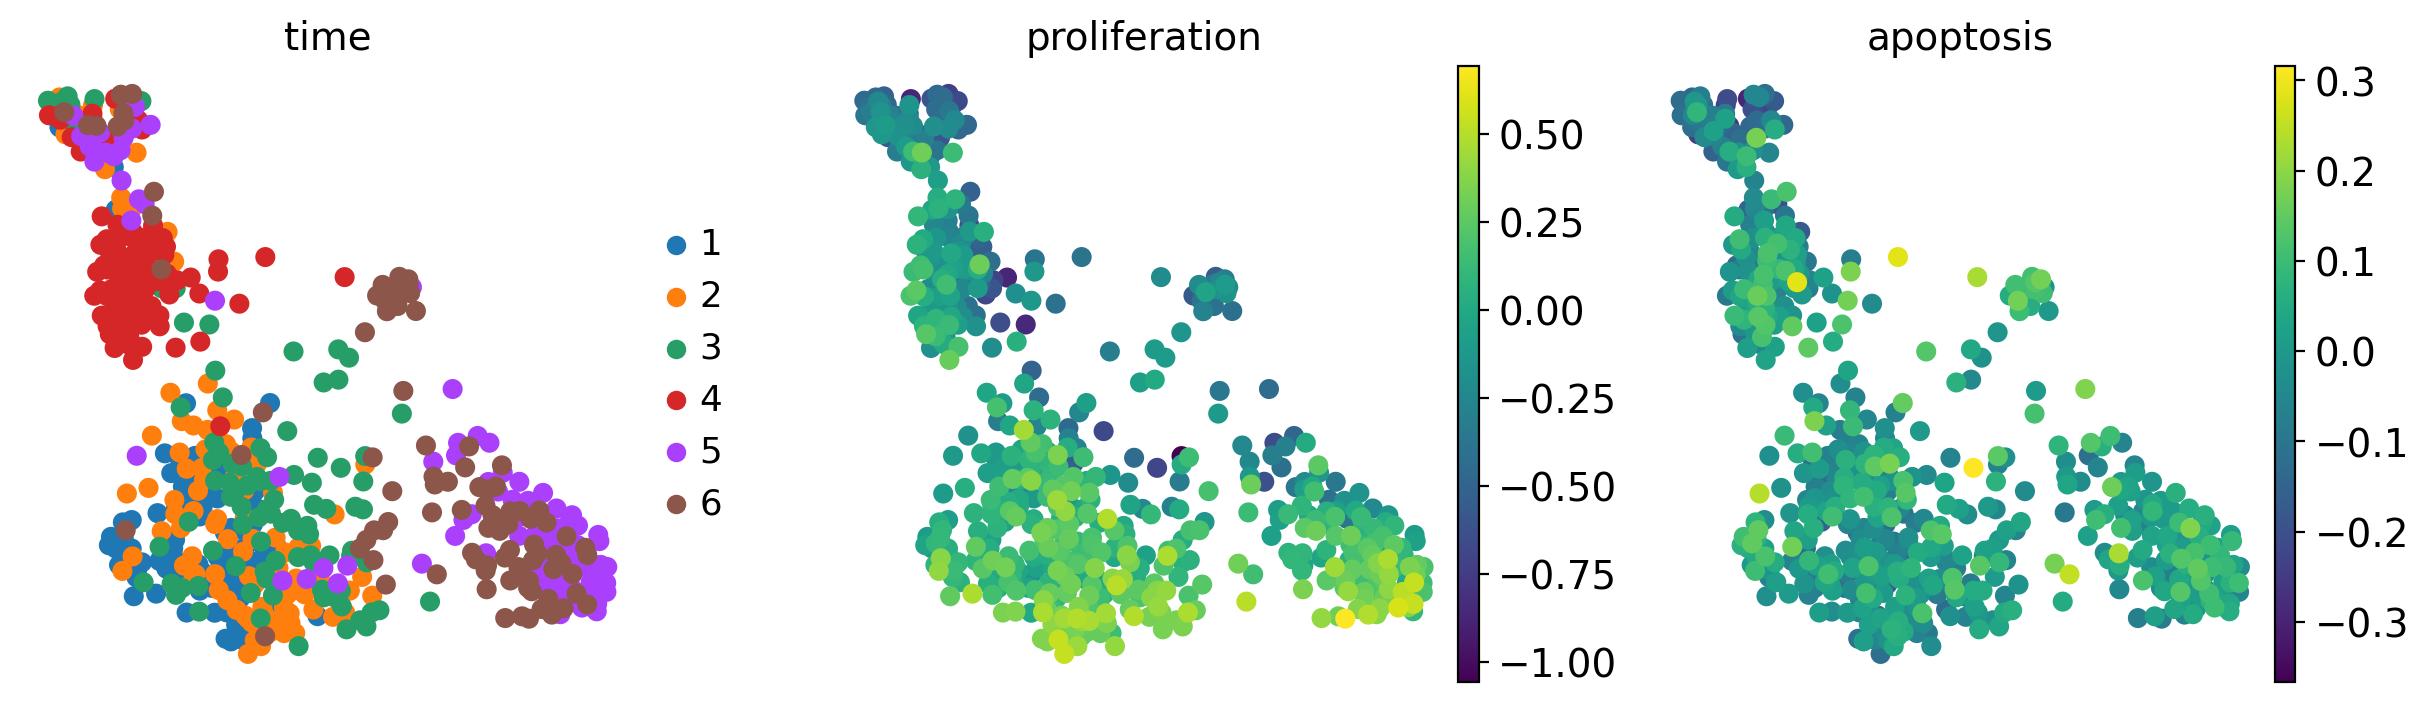

In [59]:
# visualize the proliferation and apoptosis scores
with plt.rc_context():
    sc.pl.embedding(
        adata, basis="X_draw_graph_fa", color=["time", "proliferation", "apoptosis"],
        show=False)
    plt.tight_layout()
    plt.savefig(out_dir + "prolif-apop_graph.pdf", bbox_inches='tight')

In [36]:
type(tp)

moscot.problems.time._lineage.TemporalProblem

In [39]:
# Following the original Waddington OT publication, we use local PCAs, computed separately for each pair of time points, to calulate distances among cells.
tp = tp.prepare(time_key="time")

INFO     Ordering Index(['Sub_805_ResyncTime1_001', 'Sub_805_ResyncTime1_002',                                     
                'Sub_805_ResyncTime1_003', 'Sub_805_ResyncTime1_004',                                              
                'Sub_805_ResyncTime1_005', 'Sub_805_ResyncTime1_006',                                              
                'Sub_805_ResyncTime1_007', 'Sub_805_ResyncTime1_008',                                              
                'Sub_805_ResyncTime1_009', 'Sub_805_ResyncTime1_010',                                              
                ...                                                                                                
                'Sub_810_ResyncTime6_087', 'Sub_810_ResyncTime6_088',                                              
                'Sub_810_ResyncTime6_089', 'Sub_810_ResyncTime6_090',                                              
                'Sub_810_ResyncTime6_091', 'Sub_810_ResyncTime6_092',   

In [40]:
# We solve one OT problem per time point pair, probabilistically matching early to late cells.

tp = tp.solve(epsilon=1e-3, tau_a=0.95, scale_cost="mean")
# Above, epsilon and tau_a control the amount of entropic regularization and unbalancedness on the source marginal, respectively. 
# Higher entropic regularization speeds up the optimization and improves statistical properties of the solution [Cuturi, 2013]; 
# unbalancedness makes the solution more robust with respect to uncertain cellular growth rates and biased cell sampling

INFO     Solving `5` problems                                                                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(96, 96)].                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(96, 96)].                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(96, 96)].                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(96, 96)].                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(96, 96)].                                      


In [41]:
# Set up the RealTimeKernel

tmk = RealTimeKernel.from_moscot(tp)

In [42]:
# to get from OT transport maps to a markov chain:
# 1. we sparsify OT transport maps by removing entries below a certain threshold; entropic regularization yields dense matrices which would make CellRank analysis very slow.
# 2. we use OT transport maps and molecular similarity to model transitions across and within time points, respectively.
# 3. we row-normalize the resulting cell-cell transition matrix (including all time points) and construct the Markov chain.

tmk.compute_transition_matrix(self_transitions="all", conn_weight=0.2, threshold="auto")

100%|██████████| 5/5 [00:00<00:00, 22239.15time pair/s]

Using automatic `threshold=0.0`


RealTimeKernel[n=576, threshold='auto', self_transitions='all']

Simulating `100` random walks of maximum length `500`


100%|██████████| 100/100 [00:08<00:00, 11.48sim/s]

    Finish (0:00:08)


Plotting random walks


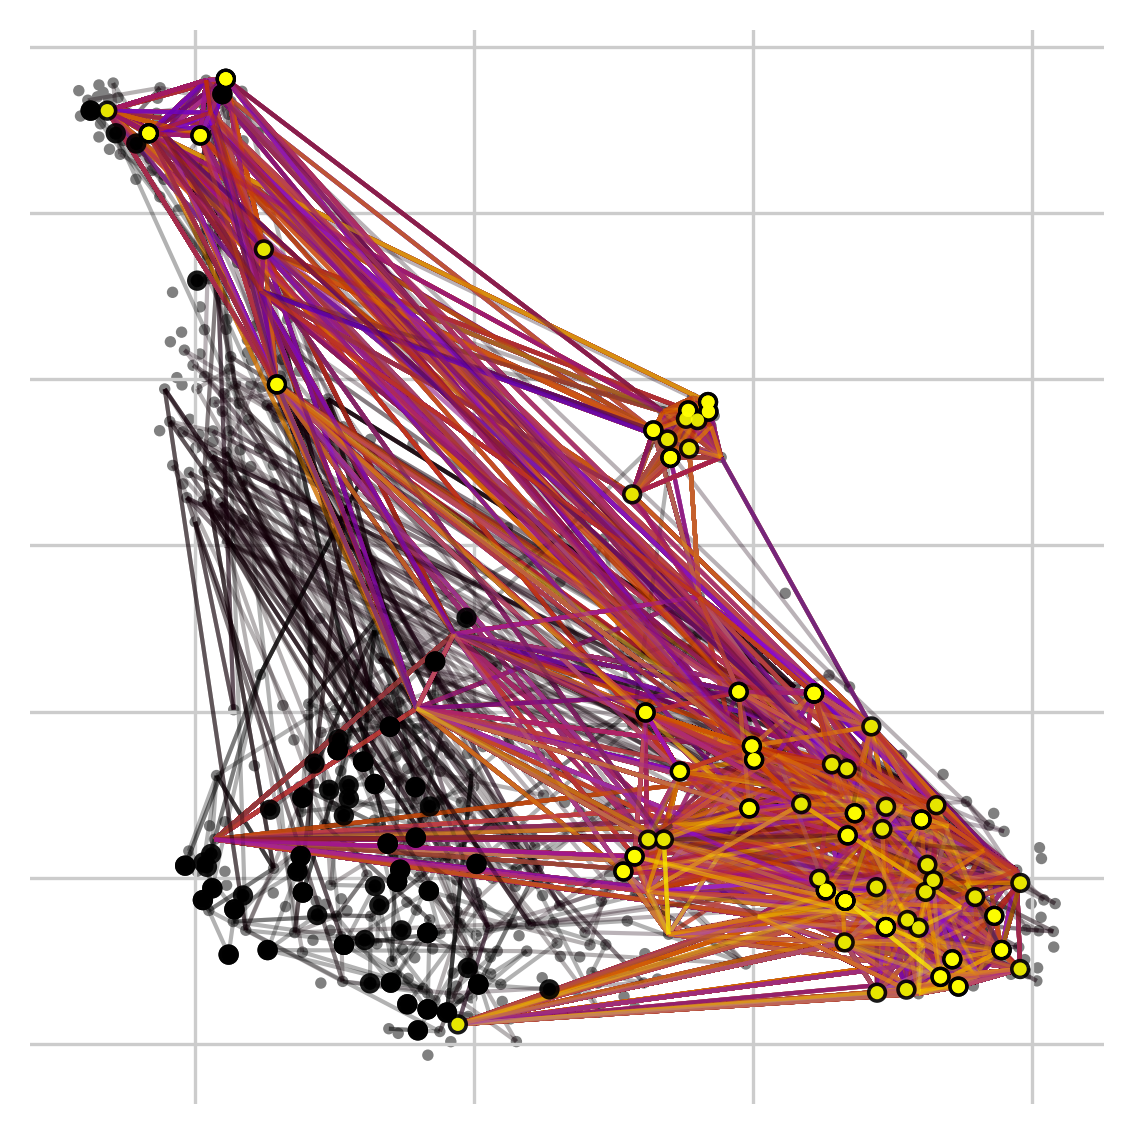

In [60]:
# Visualize the recovered dynamics by sampling random walks.
with plt.rc_context():
    tmk.plot_random_walks(
        max_iter=500,
        start_ixs={"time": 1},
        basis="X_draw_graph_fa",
        seed=0,
        dpi=150,
        size=30,
    )
    plt.tight_layout()
    plt.savefig(out_dir + "random_walks.pdf", bbox_inches='tight')
    
# Black and yellow dots denote random walks starting and finishing points, respectively.

In [48]:
print(adata.obs['seurat_clusters'].unique())

[1, 2, 4, 3, 5, 0]
Categories (6, int32): [0, 1, 2, 3, 4, 5]


Computing flow from `2` into `5` cluster(s) in `5` time points
Plotting flow from `2` into `3` cluster(s) in `5` time points


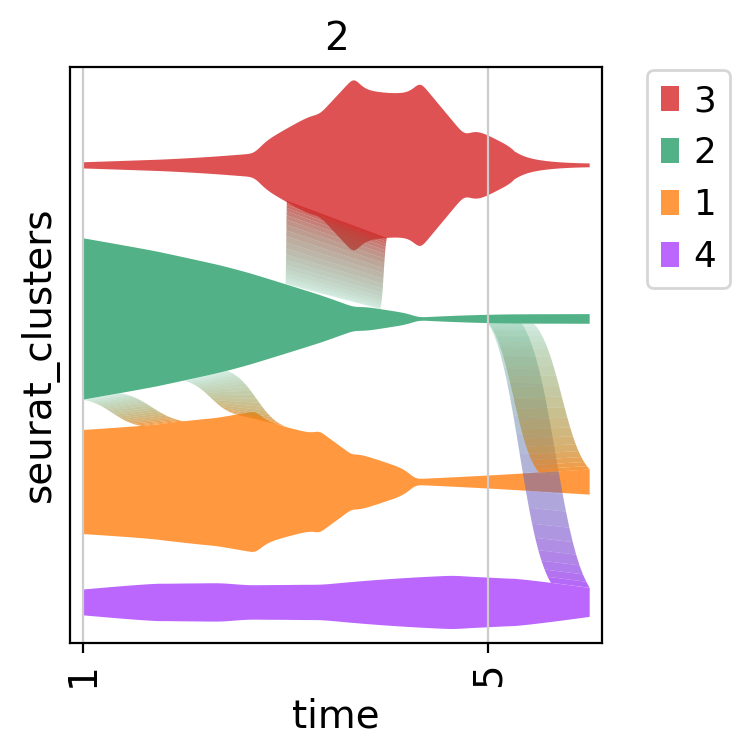

In [61]:
# plot the probability mass flow in time
with plt.rc_context():
    ax = tmk.plot_single_flow(
        cluster_key="seurat_clusters",
        time_key="time",
        cluster=2,
        min_flow=0.1,
        xticks_step_size=4,
        show=False,
        clusters=[0, 1, 2, 3, 4, 5],
        )

    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.savefig(out_dir + "prob_mass_flow.pdf", bbox_inches='tight')